<a href="https://colab.research.google.com/github/DANU011/practice-analysis/blob/main/bigdata/bigdata_chap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 단순 선형 회귀(Simple Linear Regression Model)
### 1. 정규방정식
#### (1) scikit-learn의 LinearRegression
최소 자승법을 사용한 OLS(Ordinary Least Squares) 방식으로 선형 회귀 모들을 구현한다. 즉, 계수 w = (w1, ..., wp)를 사용해 선형 모델을 피팅하여 데이터세트에서 관찰된 대상과 션형 근사에 의해 예측된 대성 간의 잔차제곱합을 최소화한다.  


매개변수 :  
 - fit_intercept (defult = True) : 절편 계산할지 여부 결정.
 - normalize (defult = False) : True인 경우 예측 변수가 회귀하기 전에 평균을 빼고 L2-norm으로 나눠서 회귀 전에 정규화됨. 표준화를 진행하고 싶으면, False로 설정한 뒤 fit()을 호출하기 전에 StandardScater() 사용.
 - copy_X (defult = True) : True인 경우 입력 데이터(예측 변수)가 복사. False인 경우 덮어씀.  
 - n_jobs (defult = None) : 계산에 사용할 작업 수. -1로 설정하면 모든 사용 가능한 CPU가 사용됨.
 - positive (defult = False) : True로 하면 계수가 양수가 됨.  


속성 :
 - coef_ (n_features,) 또는 (n_targets, n_features)의 array 형태 : 선형 회귀 문제에 대한 추정된 계수. 대상이 두 개 이상이면 2차원 배열(n_largest, n_features)이고, 대상이 하나면 길이가 n_features인 1차원 배열.
 - rank_ int : 행렬 X의 rank.
 - singular (min(X, y),)의 array 형태 : 행렬 X의 특이값.
 - intercept_ float 또는 (n_targets,)의 array 형태 : 선형 모델의 독립항(절편). False인 경우 0.0으로 설정.


메서드:  [] 안의 인자는 생략 가능.  
 - fit(X, y[, sample_weight]) :   
   - 모델을 학습시킴.
   - 매개변수 :
     - X : 학습데이터, 2차원 array 형태로 입력.
     - y : 훈련데이터, (n_features,) 또는 (n_targets, n_features)의 array 형태로 입력.
     - sample_weight : 개별데이터에 대한 가중치.
   - 반환값 : 선형 회기 모델 추정기를 Object로 반환.
 - get_params([deep]) :  
   - 선형 회귀 모델의 매개변수를 가져옴.
   - 매개변수 :
     - deep : bool 형태로 입력. default = True.
   - 반환값 : 값에 매칭되는 파라미터의 이름을 딕셔너리 형태로 반환.
 - predict(X):
   - 선형 모델을 사용해 예측.
   - 매개변수 :
     - X : 데이터 샘플
   - 반환값 : 예측값을 array로 반환.
 - score(X, y[, sample_weight]):
   - 예측의 결정계수를 반환.
   - 매개변수 :
     - X : 테스트 샘플을 array로 입력.
     - y : X의 실제 값,
     - sample_weight : 개별 데이터에 대한 가중치.
   - 반환값 : 결정계수를 float으로 반환.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 캐글의 보험 가입자 데이터를 사용한 선형 회귀 모델 구현
url = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/insurance.csv'
data = pd.read_csv(url)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


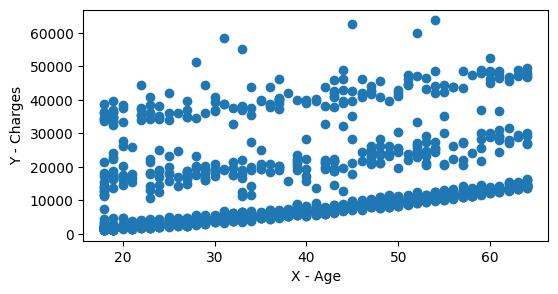

In [21]:
# age와 charges 사이의 선형성 확인
x = data['age']
y = data['charges']

plt.figure(figsize = (6, 3))
plt.scatter(x, y)
plt.xlabel('X - Age')
plt.ylabel('Y - Charges')
plt.show()

In [10]:
# age와 charges 사이에 선형성 발견. 우상향하는 추세.

# age와 charges 사이의 선형 모델 생성

# shape 맞추기
x = np.array(data['age'])
y = np.array(data['charges'])

x = x.reshape(1338, 1)# .fit() 입력 데이터는 2차원, 차원 맞추기 (rows, 1)
y = y.reshape(1338, 1)

# 학습
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [13]:
# 결과
print('====== LinearRegression Result ======')
print('절편 : ', lr.intercept_, '계수 : ', lr.coef_)

====== LinearRegression Result ======
절편 :  [3165.88500606] 계수 :  [[257.72261867]]


In [14]:
# 결정계수
print(lr.score(x, y))

0.08940589967885804


In [16]:
# 결정계수가 9%로 낮음. 잘 적합되지 못함.

# 새로운 데이터 샘플을 선형 회귀 모델에 입렵
x_new = [[19],[64]]
y_hat = lr.predict(x_new)
print(y_hat) # 모델이 예측한 값은 y hat(ŷ)으로 표현

[[ 8062.61476073]
 [19660.13260074]]


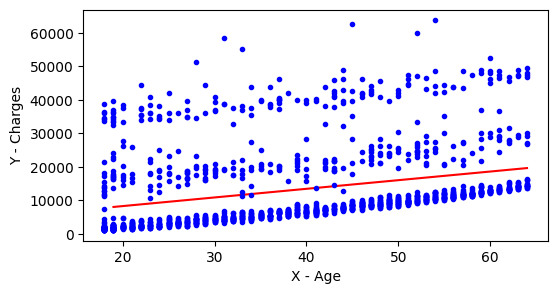

In [22]:
# 선형 모델이 데이터를 얼마나 설명할 수 있는지 확인
plt.figure(figsize = (6, 3))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X - Age')
plt.ylabel('Y - Charges')
plt.show()

In [23]:
# 빨간색 선 그래프는 모델의 예측값
# 파란색 점 그래프는 실제 데이터
# 모델의 예측이 실제 데이터와 얼마나 일치하는지 시각적으로 확인할 수 있음.

### 2. 경사하강법